In [139]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import thinkstats2
import math
import numpy
import pywt
import matplotlib.pyplot as mplib

%precision 3
%matplotlib inline

PI2 = 2 * math.pi
i = complex(0, 1)

In [140]:
wave = thinkdsp.read_wave('100475__iluppai__saxophone-weep.wav')
wave.normalize()
wave.make_audio()

In [141]:
wave.ys

array([-0.001,  0.002,  0.   , ..., -0.004, -0.002, -0.001])

In [142]:
wave2 = thinkdsp.Wave(ys=wave.ys,framerate=44000)

In [143]:
wave2seg = wave2.segment(start=1.2, duration=1.2)
wave2seg.apodize()
wave2seg.make_audio()
# wave2.make_audio()

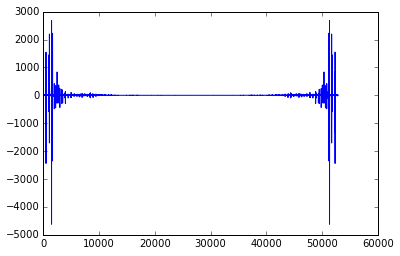

In [144]:
# spec = wave2.make_spectrum()
# thinkplot.Show()
spec = numpy.fft.fft(wave2seg.ys)
mplib.plot(spec)
# mplib.xlim([0,20000])

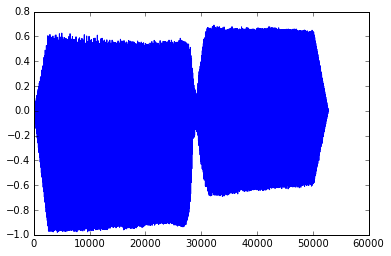

In [145]:
mplib.plot(wave2seg.ys)

In [146]:
cA, cD = pywt.dwt(wave2seg.ys, 'Haar')

In [147]:
z = numpy.zeros(len(cD))

In [148]:
approx = pywt.idwt(cA, z, 'Haar')

In [149]:
wave_approx = thinkdsp.Wave(ys=approx, framerate=44000)
wave_approx.make_audio()

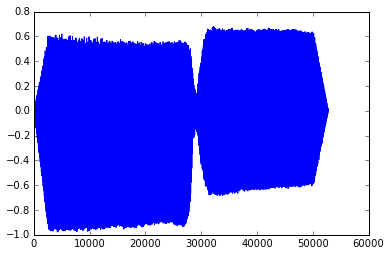

In [150]:
mplib.plot(wave_approx.ys)

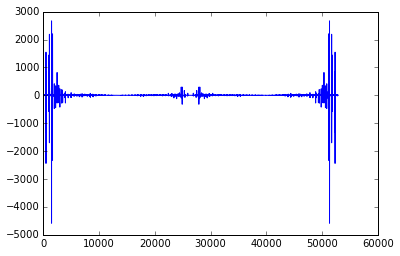

In [151]:
spec = numpy.fft.fft(approx)
mplib.plot(spec)
# mplib.xlim([0,20000])

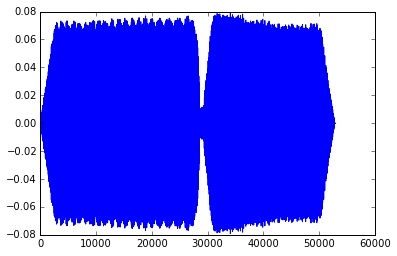

In [153]:
mplib.plot(wave2seg.ys-wave_approx.ys)
mplib.ylim